<a href="https://colab.research.google.com/github/SniffSpoof/Programming_lessons_in_ThirdGym/blob/main/Posterization_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://vk.cc/c0xRMl

# Фильтр постеризации

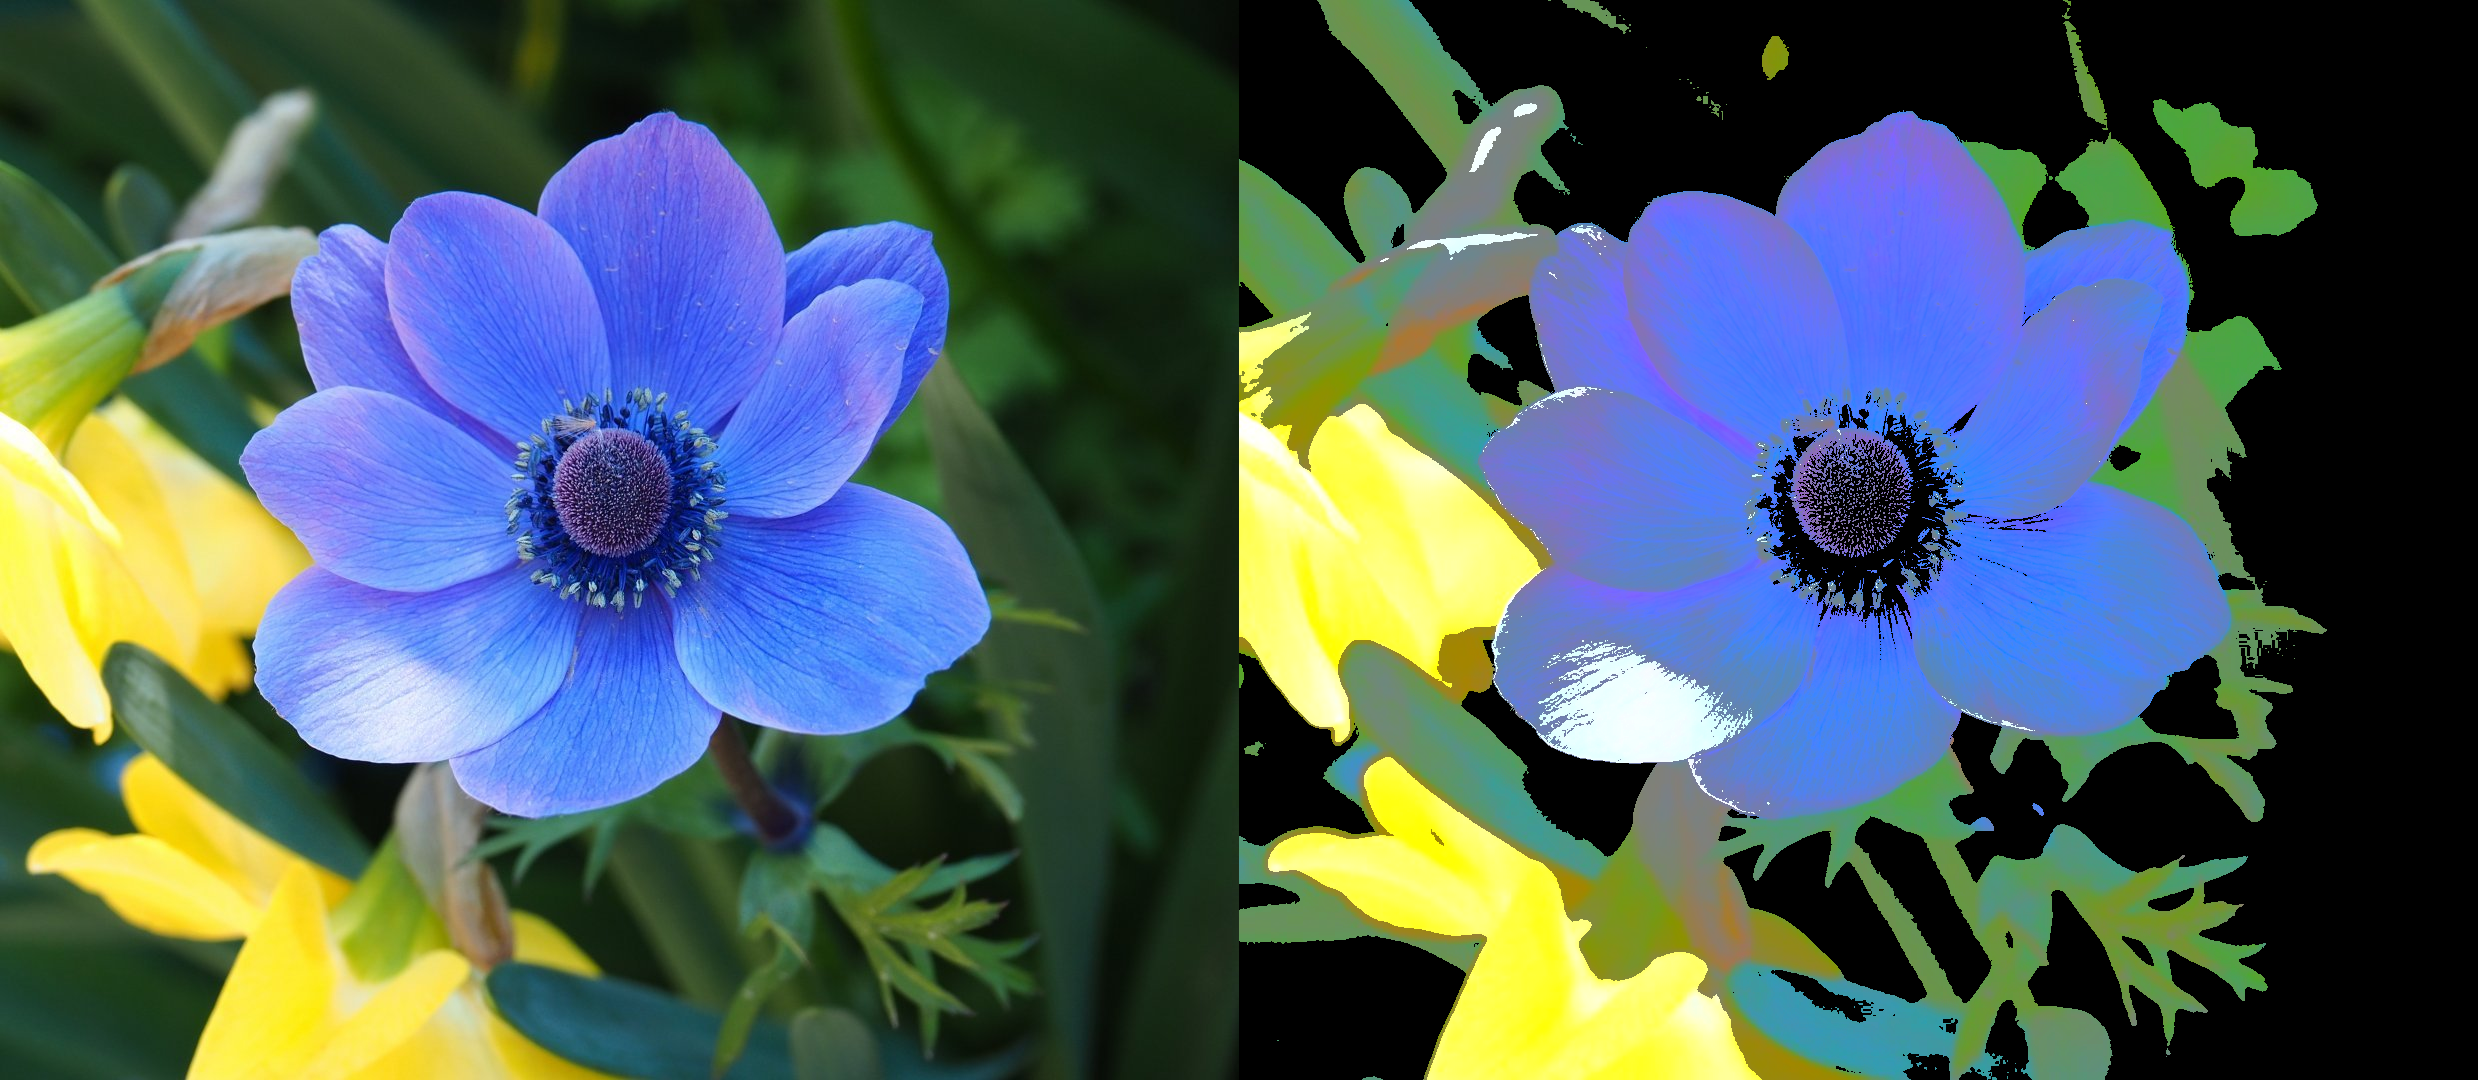

### Импортируйте библиотеки

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

### Загрузите изображение и преобразуйте его в серый

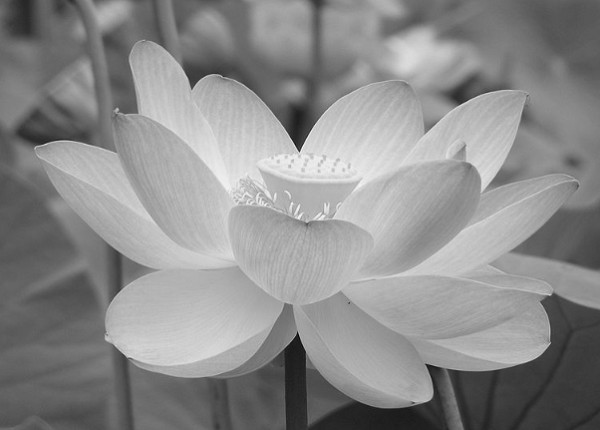

In [ ]:
img = cv2.imread("sample.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

### Для каждого пикселя

Переведите значение пикселя из отрезка [0, 255] в отрезок [0, 1]. Разделите этот отрезок на желаемое количество уровней. Выберите ближайшую к значению пикселя границу уровня 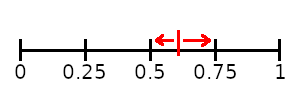 и разделите ее на значение пикселя.

In [ ]:
# pixel - число из [0, 255]
def normalize(pixel):
  #верните новое значение из [0,1]
  return pixel/255

In [ ]:
# pixel - число из [0, 1]
# levels - количтество отрезков, на которые делится [0, 1]
def upperBound(pixel, levels):
  #верните верхнюю границу
  level = 1/levels
  for i in range(0, levels+1):
    bound = i/levels
    if (bound > pixel):
      return bound

In [ ]:
# pixel - число из [0, 1]
# levels - количтество отрезков, на которые делится [0, 1]
def lowerBound(pixel, levels):
  #верните нижнюю границу
  up_bound = upperBound(pixel, levels)
  level = 1/levels
  return up_bound - level

print(lowerBound(0.99, 4))

0.75


In [ ]:
# pixel - число из [0, 1]
# levels - количтество отрезков, на которые делится [0, 1]
def nearestBound(pixel, levels):
  #верните ближайшую границу
  up = upperBound(pixel, levels)
  down = lowerBound(pixel, levels)
  to_up = up - pixel
  to_down = pixel - down
  return min(to_up, to_down)

In [ ]:
# pixel - число из [0, 1]
# bound - ближайшая граница
def adjustment(pixel, bound):
  #верните отношение границы к значению пикселя
  return bound/pixel if pixel != 0 else 0

### В цветном изображении умножьте все каналы пикселя на соответствующий ему adjustment, выведите полученный результат

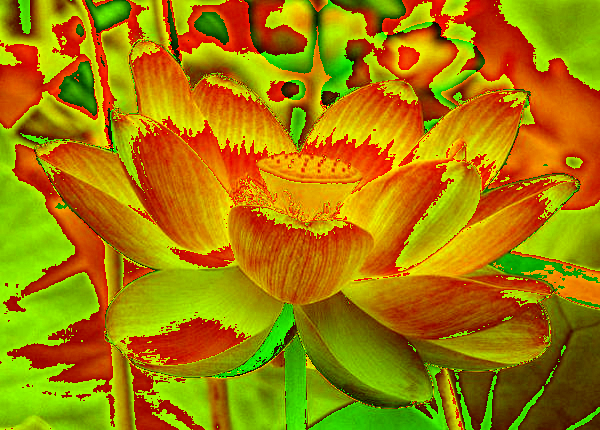

In [ ]:
img = cv2.imread("sample.jpg")
for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    for j in range(3):
      img[x][y][j] = img[x][y][j] * adjustment(j, 4)

cv2_imshow(img)